In [1]:
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt
import itertools
import numpy as np
from typing import Any, Dict, List, Tuple, Union
from sklearn import metrics

from src.algorithms.Kmeans import Kmeans
from src.algorithms.DBscan import DBscan
from src.algorithms.isolation_forest import IsolationForest
from src.algorithms.gan import GAN

from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.utils.estimator_checks import check_estimator
import csv
import os


2024-04-02 10:17:59.650212: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-02 10:17:59.650250: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dfs = {}

for i in range(1, 10):
    dfs[f'df_{i}'] = pd.read_csv(f'data/ads-{i}.csv')

In [3]:
df = pd.read_csv(f'data/validation/ads-{i}.csv')
df.head(5)

,timestamp,ftr_vector,label,labelInfo
0,188.50,3.221748,True,3.735706
1,188.51,-1.242986,False,0.000000
2,188.52,-0.026858,False,0.000000
3,188.53,-1.096959,False,0.000000
4,188.54,-0.158673,False,0.000000


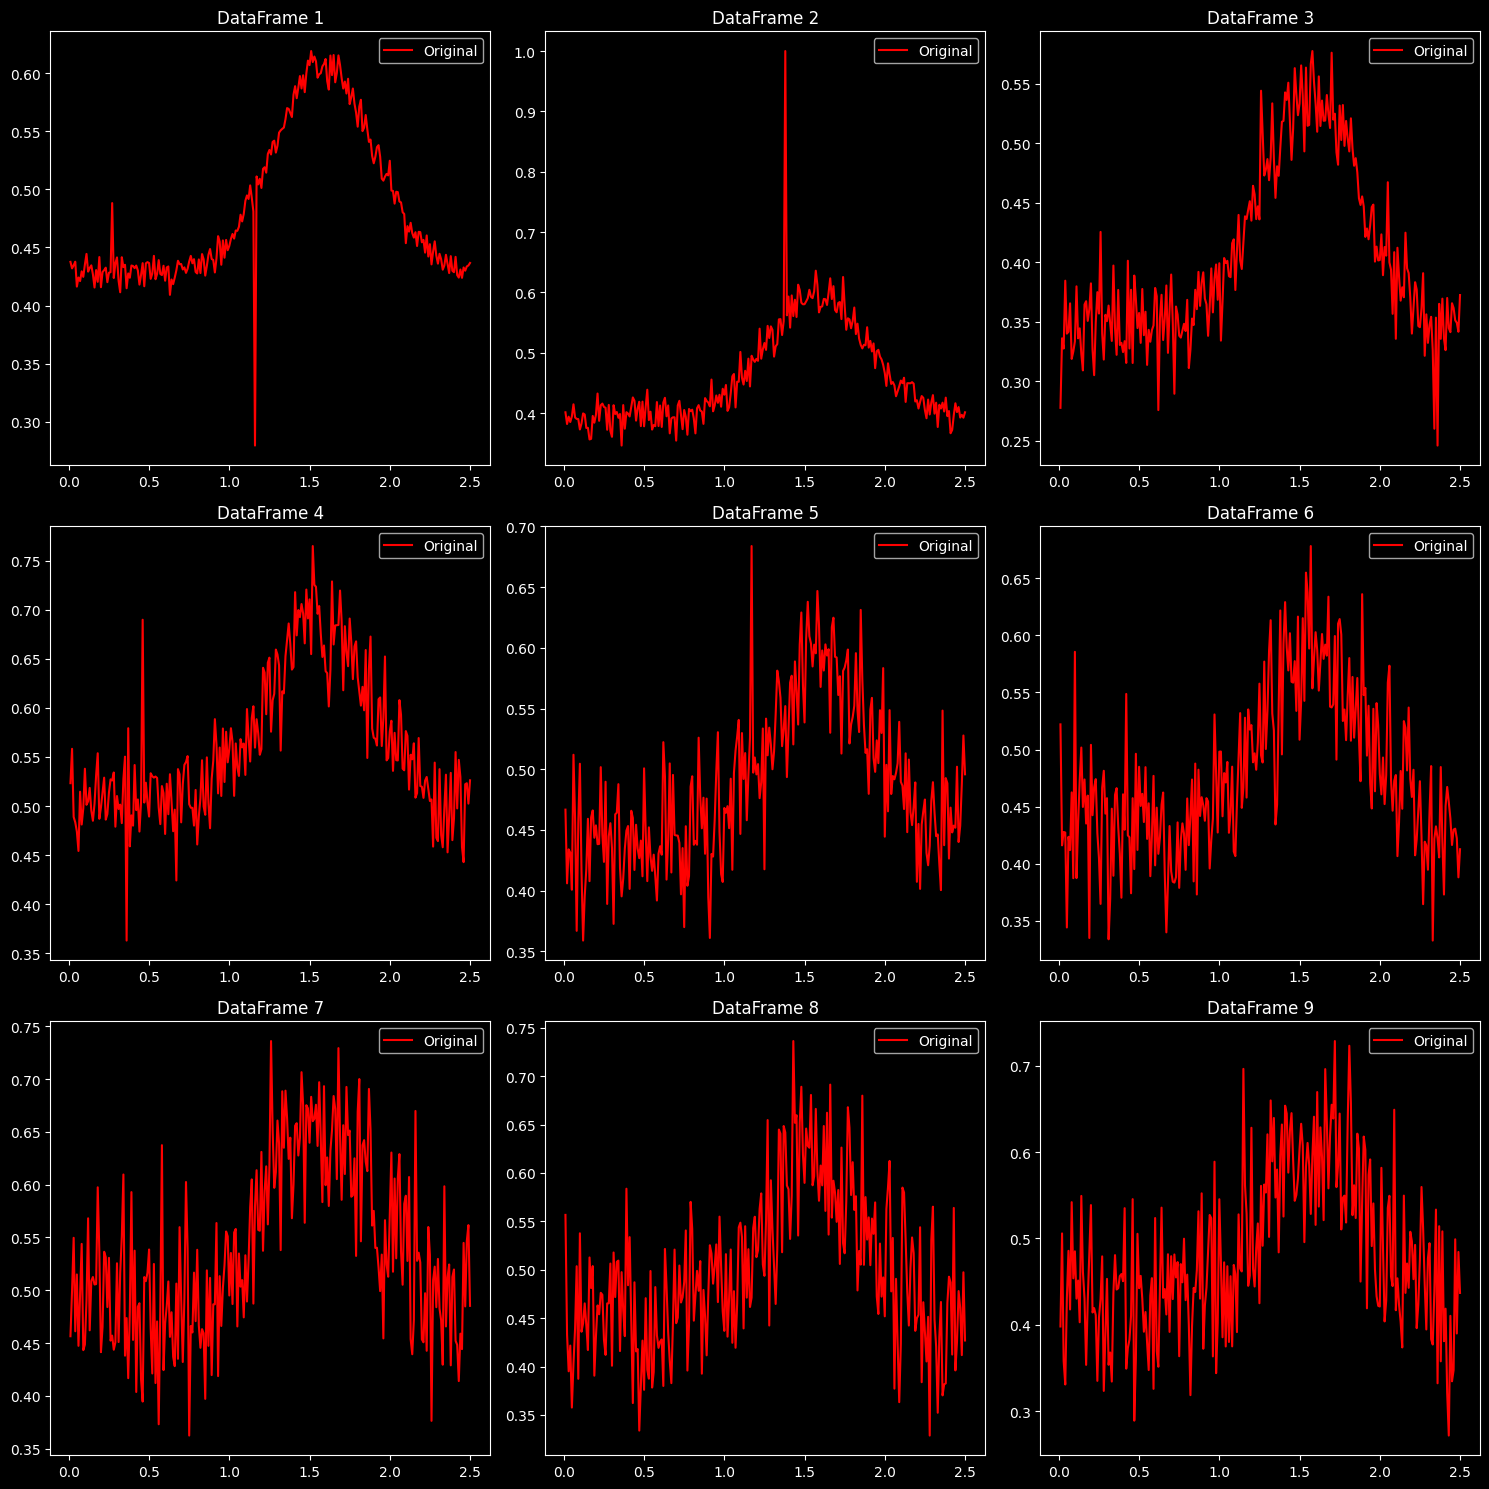

In [4]:

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        # Calculate the index for accessing the dfs dictionary
        index = i * 3 + j + 1
        # Check if the index exists in the dictionary before plotting
        if f'df_{index}' in dfs:

            min_value = dfs[f'df_{index}']['ftr_vector'].min()
            max_value = dfs[f'df_{index}']['ftr_vector'].max()
            dfs[f'df_{index}']['ftr_vector'] = (dfs[f'df_{index}']['ftr_vector'] - min_value) / (max_value - min_value)


            axs[i, j].plot(dfs[f'df_{index}']['timestamp'].iloc[:250], dfs[f'df_{index}']['ftr_vector'].iloc[:250], label="Original", color='red')
            dx =  dfs[f'df_{index}']['timestamp'].iloc[1] - dfs[f'df_{index}']['timestamp'].iloc[0]
            dy_dx = np.gradient(dfs[f'df_{index}']['ftr_vector'].iloc[:250], dx)

            min_value = dy_dx.min()
            max_value = dy_dx.max()
            dy_dx = (dy_dx - min_value) / (max_value - min_value)

            #axs[i, j].plot(dfs[f'df_{index}']['timestamp'].iloc[:250], dy_dx, label="Derivative")

            axs[i, j].set_title(f'DataFrame {index}')
            axs[i, j].legend()

plt.tight_layout()
plt.show()



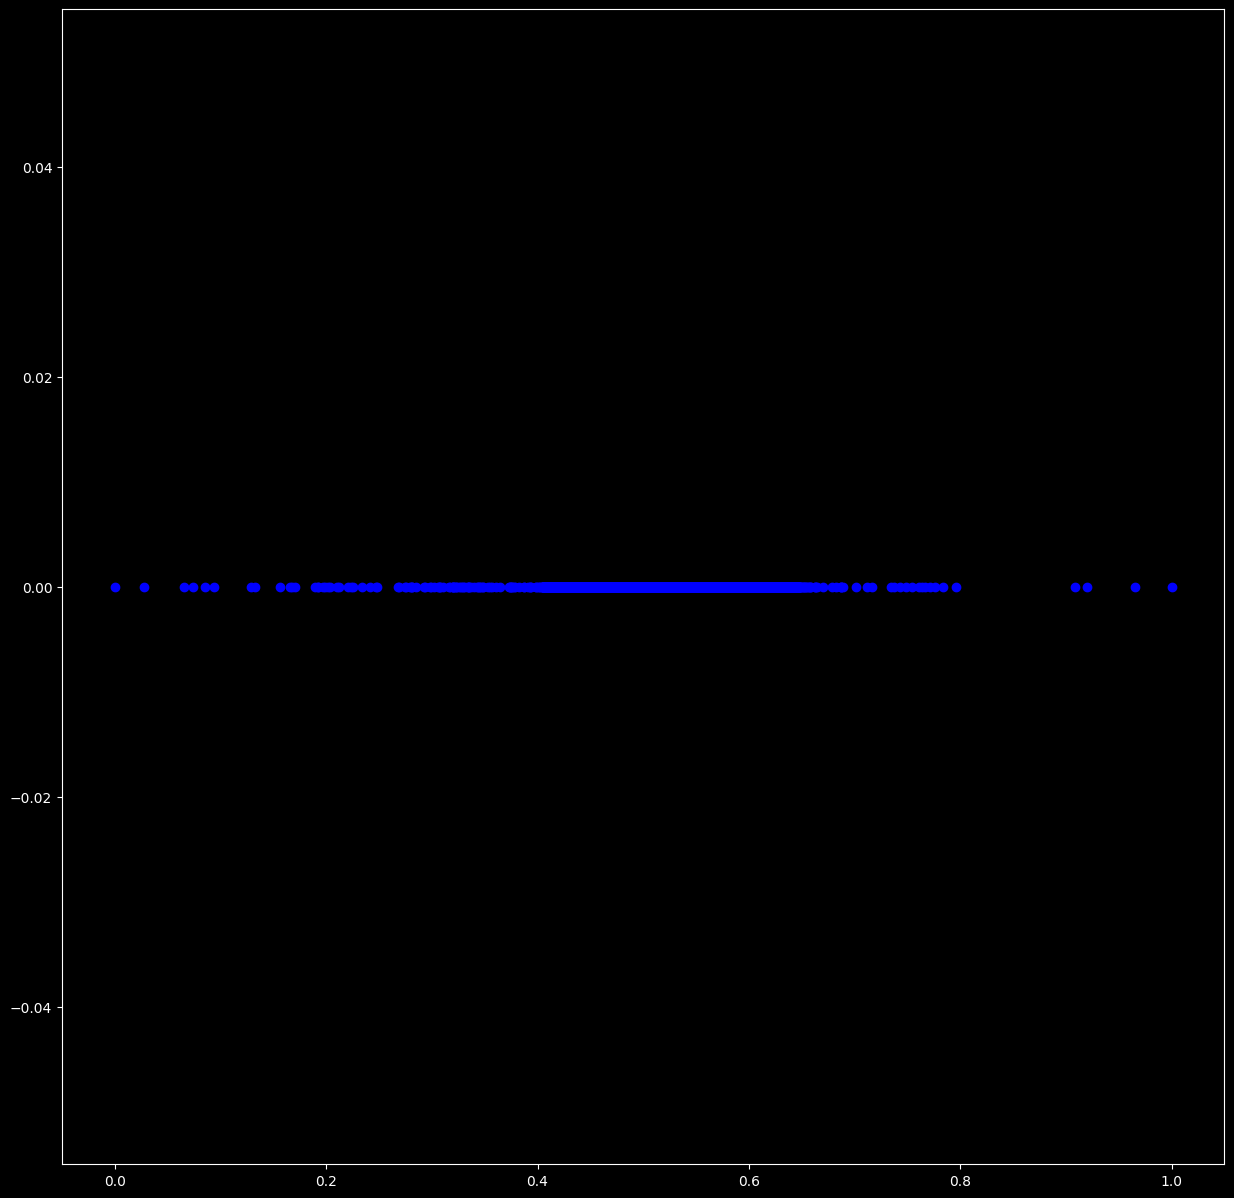

In [5]:
fig, axs = plt.subplots(figsize=(15, 15))

plt.plot(dfs[f'df_1']['ftr_vector'], [0] * len(dfs[f'df_1']), 'bo')